# Setup

In [1]:
import numpy as np
from PIL import Image

from dataset import Dataset
from classification_tree import Tree

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

# Dataset

In [2]:
columns_csv = ['product_name', 'product_description', 'product_information', 'amazon_category_and_sub_category']
columns_json = ['name', 'description', 'information' ,'category']

filename = 'datasets/amazon_co-ecommerce_sample.csv'


In [3]:
dataset = Dataset(filename)

In [4]:
dataset.csv_to_json(columns_csv, columns_json)

In [5]:
dataset.load(text_field='name', label_field='category')

690 lines skipped (not labeled)
0 lines skipped (not text)


In [6]:
dataset.data.head(5)

,label,text
0,hobbies > model trains & railway sets > rail v...,hornby 2014 catalogue
1,hobbies > model trains & railway sets > rail v...,funkybuys large christmas holiday express fest...
2,hobbies > model trains & railway sets > rail v...,classic toy train set track carriages light en...
3,hobbies > model trains & railway sets > rail v...,hornby coach r4410a br hawksworth corridor 3rd
4,hobbies > model trains & railway sets > rail v...,hornby 00 gauge 0 4 0 gildenlow salt co steam ...


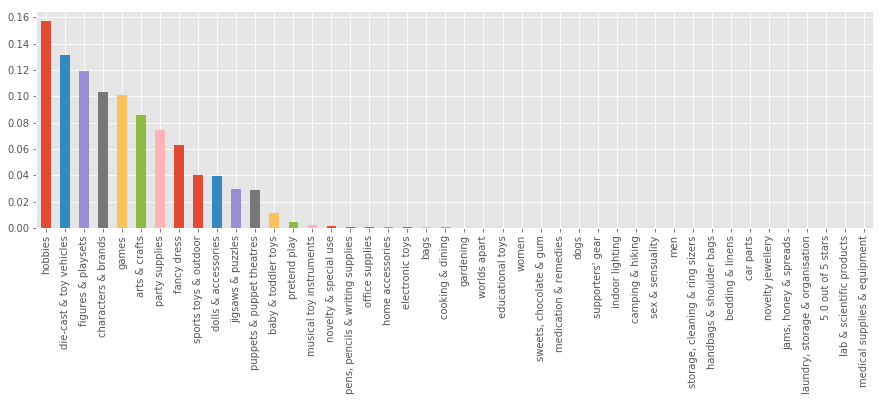

In [7]:
dataset.distrib_root_label()

All labels with minimum 0 samples: 256


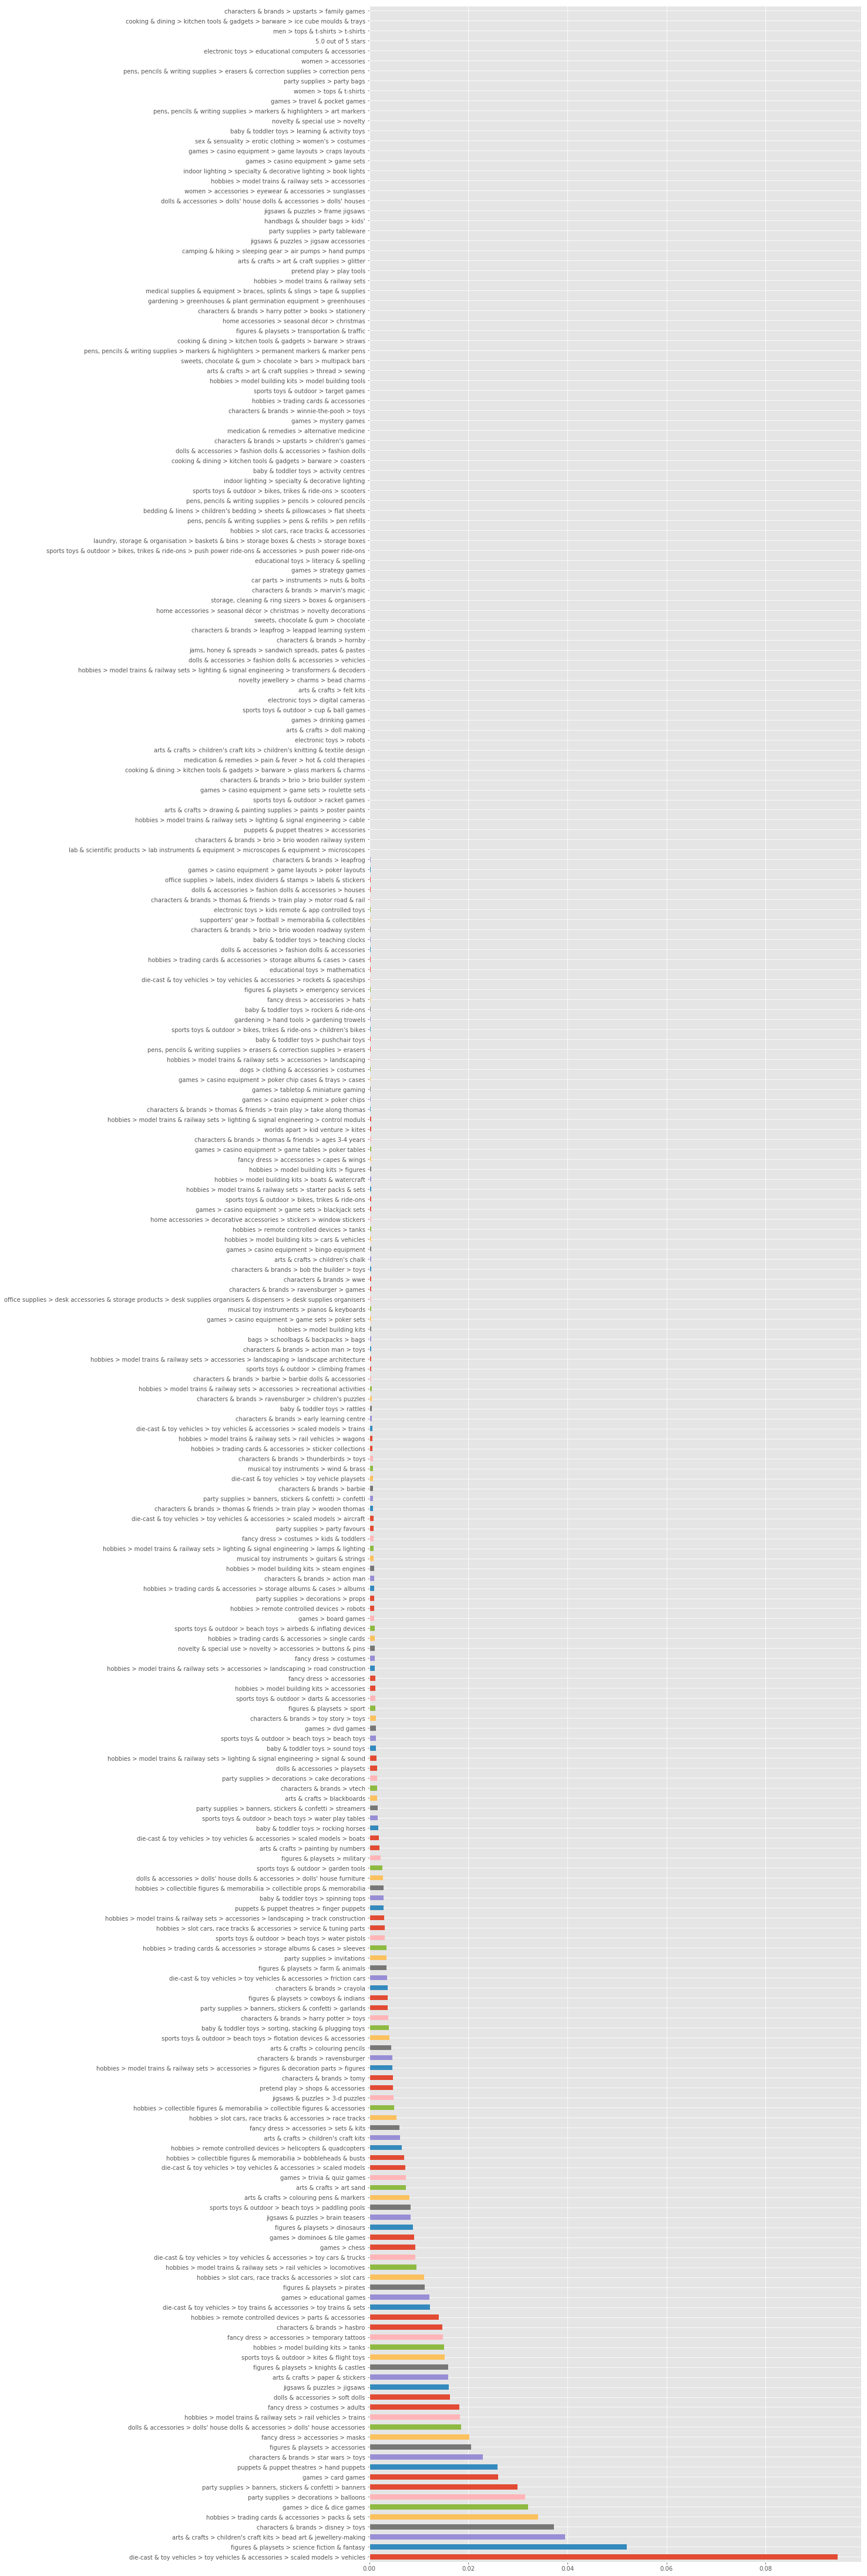

In [8]:
dataset.distrib_label()

In [9]:
dataset.filer_data()

Total filtered labels: 171


Text Length Max:  67
Text Length Min:  1
Text Length Mode: 6
Text Length Mean: 8.42
Text Length Std:  4.18
S/W Text Ratio:   8.42


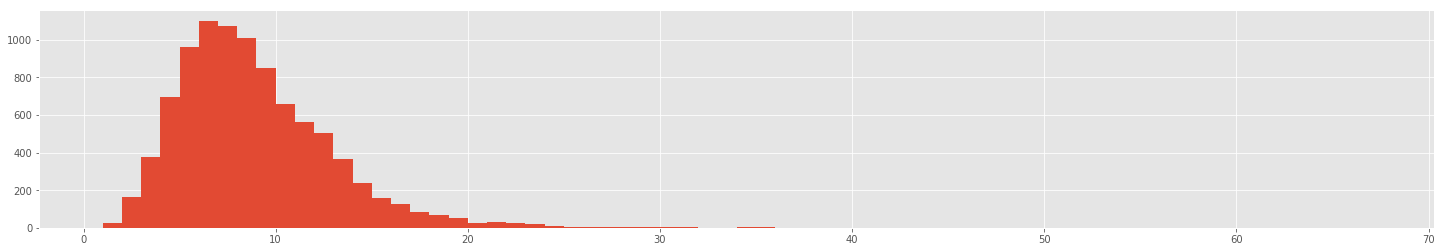

In [10]:
dataset.text_info()

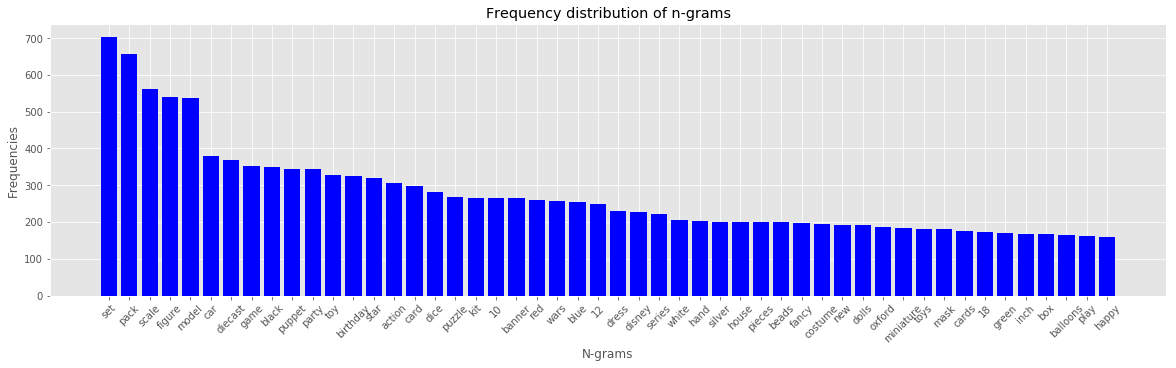

In [11]:
dataset.frequency_distribution_of_ngrams(ngram_range=(1, 2), num_ngrams=50)

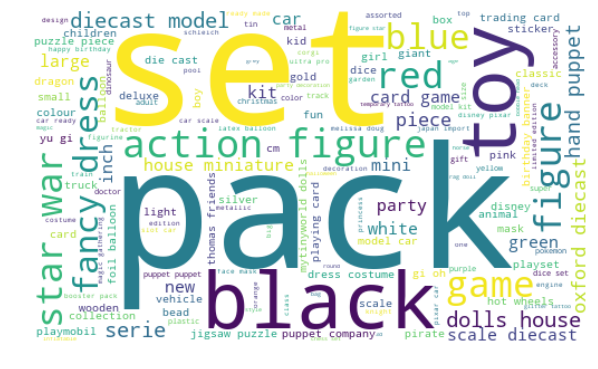

In [14]:
# import numpy as np
# from PIL import Image
# def transform_format(val):
#     if val == 0:
#         return 255
#     else:
#         return val

# cloud_mask = np.array(Image.open("./dataset/mask-cloud.png"))

# trasformed_cloud_mask = np.ndarray((cloud_mask.shape[0],cloud_mask.shape[1]), np.int32)

# for i in range(len(wine_mask)):
#     trasformed_cloud_mask[i] = list(map(transform_format, cloud_mask[i]))

dataset.word_cloud(figsize=(10,10))#mask=trasformed_cloud_mask)

# Embedding

In [ ]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from sklearn.manifold import TSNE

In [ ]:
sentences = dataset.text.transform(lambda t: t.split())
word2vec = Word2Vec(sentences, size=100, max_vocab_size=20000, iter=10)

In [ ]:
vocab = list(word2vec.wv.vocab)
X = word2vec[vocab]

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [ ]:
import pandas as pd
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [ ]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

# Classification Tree

In [ ]:
tree = Tree('Root')    
for label in dataset.label:
    split = label.split(' > ')
    tree = tree.populateTree(split, 0)

In [ ]:
x_train = dataset.text
y_train = dataset.label
tree.sampleTree(x_train, y_train, 0)
print()